<a href="https://colab.research.google.com/github/niranjanamani/Data-Science/blob/main/Datascience_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOGISTIC REGRESSION

In [ ]:
!pip install seaborn

In [ ]:
# STEP 2: Load your dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

In [ ]:
# STEP 3: Clean the data
df = pd.read_csv("/content/student_depression_dataset.csv")
print(df.head())

   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

        Sleep Duration Dietary Habits   Degree  \
0          '5-6 hours'        Healthy  B.Pharm   
1          '5-6 hours'       Moderate      BSc   
2  'Less than 5 hours'        Healthy       BA   
3     

D

In [ ]:
# Drop the 'id' column from the DataFrame 'df' and assign the result back to 'df'
df = df.drop(columns=['id'])

In [ ]:
# STEP 4: Separate the target (what we're trying to predict) from the rest
# 'Depression' is what we want to predict (0 = no, 1 = yes)

X = df.drop('Depression', axis=1)  # Features
y = df['Depression']  # Target variable

In [ ]:
import pandas as pd

In [ ]:
# STEP 4: Separate the target (what we're trying to predict) from the rest
# 'Depression' is what we want to predict (0 = no, 1 = yes)
numerical = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical = X.select_dtypes(include=['object']).columns.tolist()


In [ ]:
# STEP 5: Figure out which columns are numbers and which are text
numerical = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical = X.select_dtypes(include=['object']).columns.tolist()


In [ ]:
# STEP 6: Set up how to handle the data
# - We'll scale numbers so they all have equal weight
# - We'll turn text into numbers using one-hot encoding
# Import ColumnTransformer and OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

preprocess = ColumnTransformer([
    ('scale_numbers', StandardScaler(), numerical),
    ('encode_text', OneHotEncoder(handle_unknown='ignore'), categorical)
])

In [ ]:
# STEP 7: Put everything into a single pipeline
# This combines preprocessing + the logistic regression model
# Import the Pipeline class
from sklearn.pipeline import Pipeline

model = Pipeline([
    ('prepare_data', preprocess),
    ('logistic_regression', LogisticRegression(max_iter=1000))  # More iterations = better chances to converge
])

In [ ]:
# STEP 8: Split the data into training and testing parts
# 80% of the data will be used to train the model, 20% to test how well it performs
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# STEP 9: Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('prepare_data',
                 ColumnTransformer(transformers=[('scale_numbers',
                                                  StandardScaler(),
                                                  ['Age', 'Academic Pressure',
                                                   'Work Pressure', 'CGPA',
                                                   'Study Satisfaction',
                                                   'Job Satisfaction',
                                                   'Work/Study Hours']),
                                                 ('encode_text',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'City',
                                                   'Profession',
                                                   'Sleep Duration',
                                                   'Dietary Habits', 'Degree',
                                                   'Have you ever had suicidal '
                                                   'thoughts ?',
                                                   'Financial Stress',
                                                   'Family History of Mental '
                                                   'Illness'])])),
                ('logistic_regression', LogisticRegression(max_iter=1000))])

In [ ]:
# STEP 10: Make predictions on the test data
predictions = model.predict(X_test)

In [ ]:
# STEP 11: Show how well the model performed
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Import confusion_matrix

print("Accuracy of the model:", accuracy_score(y_test, predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, predictions))
print("\nDetailed Report:\n", classification_report(y_test, predictions))

Accuracy of the model: 0.8394552947500448

Confusion Matrix:
 [[1849  494]
 [ 402 2836]]

Detailed Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80      2343
           1       0.85      0.88      0.86      3238

    accuracy                           0.84      5581
   macro avg       0.84      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581



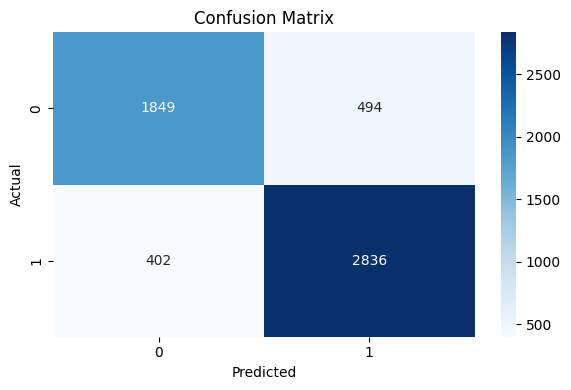

In [ ]:
# Confusion Matrix Visualization
cm = confusion_matrix(y_test, predictions) # Changed y_pred to predictions
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [ ]:
# STEP 11: Cross-validation
from sklearn.model_selection import cross_val_score # Import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("\nCross-validation scores:", cv_scores)
print("Average cross-validation accuracy:", cv_scores.mean())


Cross-validation scores: [0.84303888 0.85358423 0.84498208 0.84623656 0.85394265]
Average cross-validation accuracy: 0.8483568803268129


In [ ]:
# STEP 12: Save the model
import joblib # Import the joblib library

joblib.dump(model, 'logistic_model.pkl')
print("\nModel saved as 'logistic_model.pkl'")


Model saved as 'logistic_model.pkl'


RANDOM FOREST

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [5]:
# Load dataset
df = pd.read_csv('/content/student_depression_dataset.csv')

In [6]:
# Drop unnecessary column
df = df.drop(columns=['id'])

In [7]:
# Separate features and target
X = df.drop(columns=['Depression'])
y = df['Depression']

In [8]:
# Separate features and target
X = df.drop(columns=['Depression'])
y = df['Depression']

In [9]:
# Define categorical and numerical columns
categorical_columns = ['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits',
                       'Degree', 'Have you ever had suicidal thoughts ?', 'Financial Stress',
                       'Family History of Mental Illness']

numerical_columns = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
                     'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours']


In [10]:
# Define preprocessing pipelines
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numerical_columns),
    ('cat', categorical_pipeline, categorical_columns)
])

In [11]:
# Create pipeline with Random Forest
model = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])


In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Academic Pressure',
                                                   'Work Pressure', 'CGPA',
                                                   'Study Satisfaction',
                                                   'Job Satisfaction',
                                                   'Work/Study Hours']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'City',
                                                   'Profession',
                                                   'Sleep Duration',
                                                   'Dietary Habits', 'Degree',
                                                   'Have you ever had suicidal '
                                                   'thoughts ?',
                                                   'Financial Stress',
                                                   'Family History of Mental '
                                                   'Illness'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8279878158036195

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.77      0.79      2343
           1       0.84      0.87      0.85      3238

    accuracy                           0.83      5581
   macro avg       0.82      0.82      0.82      5581
weighted avg       0.83      0.83      0.83      5581



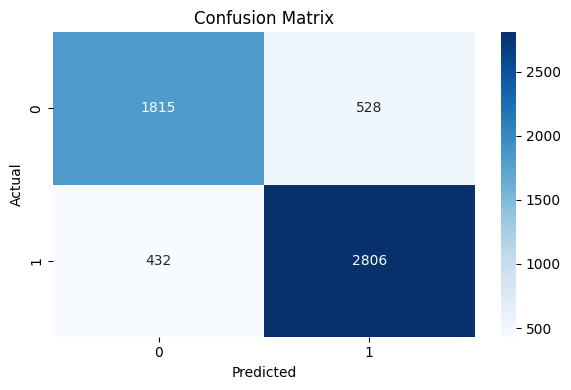

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [14]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print results
print("\nCross-validation scores:", cv_scores)
print("Average CV accuracy:", round(cv_scores.mean(), 4))



Cross-validation scores: [0.84106791 0.84301075 0.84050179 0.84014337 0.84032258]
Average CV accuracy: 0.841


In [15]:
# Save the model
joblib.dump(model, 'random_forest_model.pkl')
print("\nModel saved as 'random_forest_model.pkl'")


Model saved as 'random_forest_model.pkl'


SUPPORT VECTOR MACHINE

In [16]:
pip install pandas scikit-learn

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [18]:
# Load dataset
df = pd.read_csv("/content/student_depression_dataset.csv")

In [19]:
# Drop unnecessary columns
df = df.drop(columns=['id', 'Profession'])


In [20]:
# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [21]:
# Encode categorical variables
label_encoders = {}
for column in df_imputed.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_imputed[column] = le.fit_transform(df_imputed[column])
    label_encoders[column] = le

In [22]:
# Features and target
X = df_imputed.drop(columns='Depression')
y = df_imputed['Depression']


In [23]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [25]:
# Train SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [26]:
# Make predictions
y_pred = svm_model.predict(X_test)


In [27]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [28]:
# Output results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.83390073463537
Confusion Matrix:
 [[1811  532]
 [ 395 2843]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.77      0.80      2343
           1       0.84      0.88      0.86      3238

    accuracy                           0.83      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.83      0.83      0.83      5581



**Depression Prediction Using Machine Learning**

---



**Objective:**

To predict depression among students using three machine learning algorithms: Logistic Regression,
Random Forest, and Support Vector Machine (SVM).

**Dataset Overview:**

* Total Records: (e.g., 7000+)

* Target Variable: Depression (Binary: 0 = No, 1 = Yes)

* Features: Gender, Age, Academic Pressure, CGPA, Study Satisfaction, Sleep Duration, Financial Stress, etc.

**Data Preprocessing:**

* Missing values handled using most frequent strategy.

* Categorical variables encoded using Label Encoding.

* Features normalized using StandardScaler.

* Train-Test Split: 80% training, 20% testing

**Algorithms Used & Their Accuracy:**

* Logistic Regression 83.95%

* Random Forest 82.79%

* Support Vector Machine 83.39%

**Tools & Libraries Used:**

* Python (Pandas, scikit-learn, NumPy)

* Jupyter Notebook

* Matplotlib / Seaborn (optional for graphs)

**Conclusion**

1) In this study, three machine learning algorithms-Logistic Regression, Random
Forest, and Support Vector
Machine (SVM)-were applied to predict depression among students based on various academic, personal,
and psychological factors.


2)All three models performed well, achieving over 82% accuracy, with slight variations in precision, recall, and
F1-score. Among them, Logistic Regression emerged as the best-performing model with the highest
accuracy of 83.95%, and consistently strong classification metrics.

3)The results suggest that Logistic Regression is not only effective but also interpretable, making it a suitable
choice for binary classification problems like mental health prediction where model transparency is essential.


4)This project demonstrates the potential of machine learning in identifying mental health issues early,
providing educational institutions and healthcare providers with tools for timely intervention and support.

